Problem: Predict the survival of passengers in Titanic by machine learning

Titanic dataset is a most quoted data set in global data science community. The data has 1309 rows and 14 columns. It has a mix of variables comprising categories, numbers, and text. I'm going to train a machine learning model on this dataset to predict the survival of passengers in Titanic. The "survived" variable is treated as target which has two classes. Nine varialbles, including "pclass", "sex", "age", "sibsp", "parch", "fare", "cabin" ,"embarked", and "boat", are treated as features with an original dimension 1309 x 9. Howver after converting categorical data into numbers with Pandas' get_dummies(), the features' dimension becomes to 1309 x 223. All nulls are replaced with a number of -9.0.

To find a good classification algorithm, I evaluated Logistic Regression, K-Nearest Neighbors, Decision Trees, Extremely Randomized Trees, Random Forests, Gaussian Naive Bayes, Support Vector Machines, Gradient Boosting, and Neural Networks on processed dataset using cross validatoin method. The accuracy of each algorithm modeling with default parameters was computed. The top five algorithms were Neural Network, Logistic Regression, Gradient Boosting, Extremely Randomized Trees, and Decision Trees. Then I focused on Neura Network, Logistic Regression, and Gradient Boosting.

When modeling with Neural Networks algorithm, the best pair of accuracy scores for training set and validation set was 0.979 and 0.970, respectively. They were close. The precision, recall and f1-score of validation were 0.95, 0.95 and 0.95, respectively. The AUC (ROC) is 0.94.

When modeling with Logistic Regression algorithm, the best pair of accuracy scores for training set and validation set was 0.954 and 0.957, respectively. They were very close. The precision, recall and f1-score of validation were 0.96, 0.96 and 0.97, respectively. The AUC (ROC) is 0.99.

When modeling with Gradient Boosting algorithm, the best pair of accuracy scores for training set and validation set was 0.952 and 0.945, respectively. They were also close. The precision, recall and f1-score of validation were 0.95, 0.95 and 0.94, respectively. The AUC (ROC) is 0.96.

These findings demonstrate that a very good predicting model for the survival of passengers in Titanic can be obtained by training Logistic Regression algorithm on the Titanic dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [3]:
# load data
titanic = pd.read_csv('titanic_original.csv')

In [4]:
# check data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# remove the last row which has all nulls
titanic.drop([1309], axis=0, inplace=True)

In [8]:
# set "name" variable as index
titanic.set_index("name", inplace=True)

In [9]:
titanic.shape

(1309, 13)

In [10]:
# generate target set (y)
y = titanic["survived"]

In [12]:
# delete columns that are not used as features
columns_to_drop = ["survived", "ticket", "body", "home.dest"]
titanic.drop(labels=columns_to_drop, axis=1, inplace=True)

In [13]:
# convert objects to numbers by pandas.get_dummies
titanic = pd.get_dummies(titanic, columns=["sex", "cabin", "embarked", "boat"])

In [14]:
# check the dimension of new feature dataset
titanic.shape

(1309, 223)

In [15]:
# replace nulls with -9.0
titanic.fillna(value=-9.0, inplace=True)

In [16]:
# generate a list of features
features = list(titanic)

In [17]:
print(features)

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_female',
 'sex_male',
 'cabin_A10',
 'cabin_A11',
 'cabin_A14',
 'cabin_A16',
 'cabin_A18',
 'cabin_A19',
 'cabin_A20',
 'cabin_A21',
 'cabin_A23',
 'cabin_A24',
 'cabin_A26',
 'cabin_A29',
 'cabin_A31',
 'cabin_A32',
 'cabin_A34',
 'cabin_A36',
 'cabin_A5',
 'cabin_A6',
 'cabin_A7',
 'cabin_A9',
 'cabin_B10',
 'cabin_B101',
 'cabin_B102',
 'cabin_B11',
 'cabin_B18',
 'cabin_B19',
 'cabin_B20',
 'cabin_B22',
 'cabin_B24',
 'cabin_B26',
 'cabin_B28',
 'cabin_B3',
 'cabin_B30',
 'cabin_B35',
 'cabin_B36',
 'cabin_B37',
 'cabin_B38',
 'cabin_B39',
 'cabin_B4',
 'cabin_B41',
 'cabin_B42',
 'cabin_B45',
 'cabin_B49',
 'cabin_B5',
 'cabin_B50',
 'cabin_B51 B53 B55',
 'cabin_B52 B54 B56',
 'cabin_B57 B59 B63 B66',
 'cabin_B58 B60',
 'cabin_B61',
 'cabin_B69',
 'cabin_B71',
 'cabin_B73',
 'cabin_B77',
 'cabin_B78',
 'cabin_B79',
 'cabin_B80',
 'cabin_B82 B84',
 'cabin_B86',
 'cabin_B94',
 'cabin_B96 B98',
 'cabin_C101',
 'cabin_C103',
 'cab

In [18]:
# generate feature set (X)
X = titanic.values

In [19]:
# split feature and target sets into train and validation subsets
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)

In [20]:
# transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_validation_scale = scaler.transform(X_validation)

In [21]:
# import machine learning algorithms
from sklearn.metrics import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
# check the accuracy score of each algorithm by cross validation method
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(("NN", MLPClassifier()))
models.append(("GB", GradientBoostingClassifier()))

from sklearn import model_selection

names = []
results = []
results_mean = []
results_std = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, X_train_scale, y_train, cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())

In [23]:
# Compare algorithms: list rank
al_rank = sorted(zip(names, results_mean, results_std), key=lambda x: -np.abs(x[1]))
print("Algorithm: ", "Accuracy", "(std)")
for i in range(len(al_rank)):    
    msg = "%s: %.4f (%.4f)" % (al_rank[i][0], al_rank[i][1], al_rank[i][2])
    print(msg)

Algorithm:  Accuracy (std)
NN: 0.9714 (0.0157)
GB: 0.9480 (0.0167)
LR: 0.9470 (0.0181)
ETC: 0.9368 (0.0218)
CART: 0.9348 (0.0269)
RFC: 0.9194 (0.0340)
NB: 0.8991 (0.0213)
KNN: 0.8685 (0.0332)
SVM: 0.7809 (0.0276)


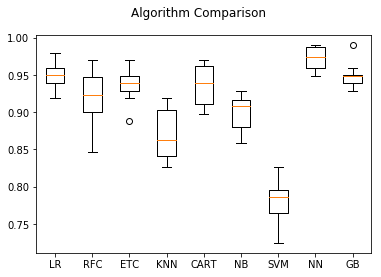

In [24]:
# Compare Algorithms: boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
# train with Neural Networks algorithm
# compute the accuracy score with different alpha when training on train and validation sets

alphas = [0.1, 0.25, 0.5, 1, 10]
for alpha in alphas:
    nn = MLPClassifier(hidden_layer_sizes=(100, 100, 20), alpha=alpha, random_state=0)
    nn.fit(X_train_scale, y_train)
    print("alpha: ", alpha)
    print("Accuracy score (training): {0:.3f}".format(nn.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(nn.score(X_validation_scale, y_validation)))
    print()

alpha:  0.1
Accuracy score (training): 0.984
Accuracy score (validation): 0.963

alpha:  0.25
Accuracy score (training): 0.980
Accuracy score (validation): 0.966

alpha:  0.5
Accuracy score (training): 0.979
Accuracy score (validation): 0.970

alpha:  1
Accuracy score (training): 0.982
Accuracy score (validation): 0.966

alpha:  10
Accuracy score (training): 0.949
Accuracy score (validation): 0.951



In [26]:
# Output confusion matrix and classification report of Neural Networks algorithm on validation set
nn = MLPClassifier(hidden_layer_sizes=(100, 100, 20), alpha=10, random_state=0)
nn.fit(X_train_scale, y_train)
predictions = nn.predict(X_validation_scale)

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification Report")
print(classification_report(y_validation, predictions))

Confusion Matrix:
[[206   2]
 [ 14 106]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96       208
        1.0       0.98      0.88      0.93       120

avg / total       0.95      0.95      0.95       328



<IPython.core.display.Javascript object>


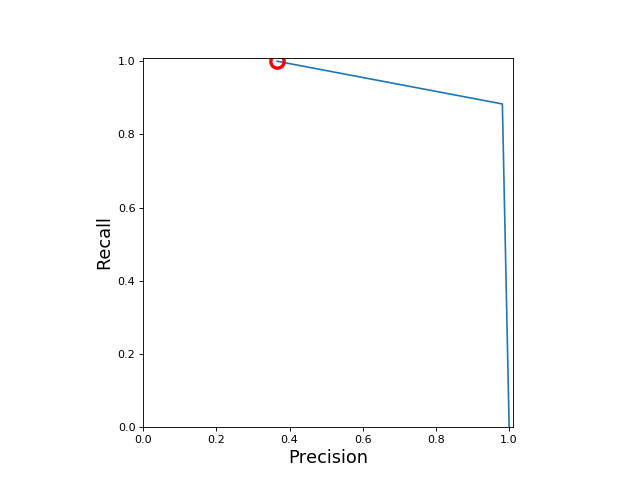

In [27]:
# precision-recall curve
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_scores_nn = nn.predict(X_validation_scale)
precision, recall, thresholds = precision_recall_curve(y_validation, y_scores_nn)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(8, 6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


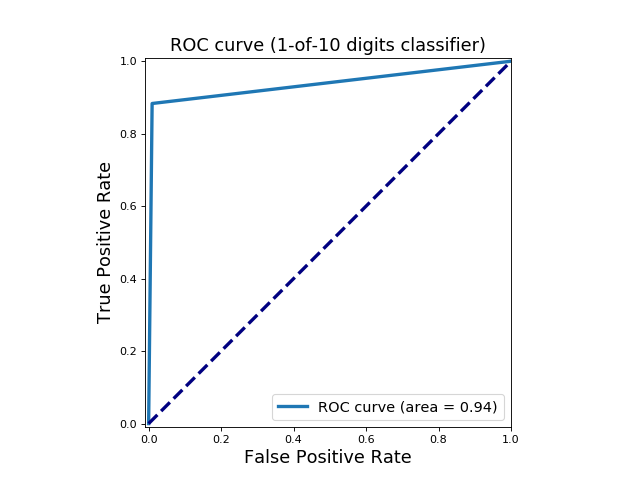

In [29]:
# ROC curve and Area-Under-Curve (AUC)
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_scores_nn = nn.predict(X_validation_scale)
fpr_nn, tpr_nn, _ = roc_curve(y_validation, y_scores_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_nn, tpr_nn, lw=3, label="ROC curve (area = {:0.2f})".format(roc_auc_nn))
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC curve (1-of-10 digits classifier)", fontsize=16)
plt.legend(loc="lower right", fontsize=13)
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
plt.axes().set_aspect("equal")
plt.show()

In [30]:
# train with Logistic Regression algorithm
# compute the accuracy score with different learning rate when training on train and validation sets

Cs = [0.1, 0.25, 0.5, 0.75, 1, 5, 10]
for c in Cs:
    lr = LogisticRegression(C=c, random_state = 0)
    lr.fit(X_train_scale, y_train)
    print("C: ", c)
    print("Accuracy score (training): {0:.3f}".format(lr.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(lr.score(X_validation_scale, y_validation)))
    print()

C:  0.1
Accuracy score (training): 0.859
Accuracy score (validation): 0.835

C:  0.25
Accuracy score (training): 0.892
Accuracy score (validation): 0.909

C:  0.5
Accuracy score (training): 0.943
Accuracy score (validation): 0.954

C:  0.75
Accuracy score (training): 0.951
Accuracy score (validation): 0.951

C:  1
Accuracy score (training): 0.954
Accuracy score (validation): 0.957

C:  5
Accuracy score (training): 0.979
Accuracy score (validation): 0.963

C:  10
Accuracy score (training): 0.981
Accuracy score (validation): 0.963



In [31]:
# Output confusion matrix and classification report of Logistic Regression algorithm on validation set

lr = LogisticRegression(C=1.0, random_state = 0)
lr.fit(X_train_scale, y_train)
predictions = lr.predict(X_validation_scale)

print("Confusion Matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification Report")
print(classification_report(y_validation, predictions))

Confusion Matrix:
[[206   2]
 [ 12 108]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97       208
        1.0       0.98      0.90      0.94       120

avg / total       0.96      0.96      0.96       328



<IPython.core.display.Javascript object>


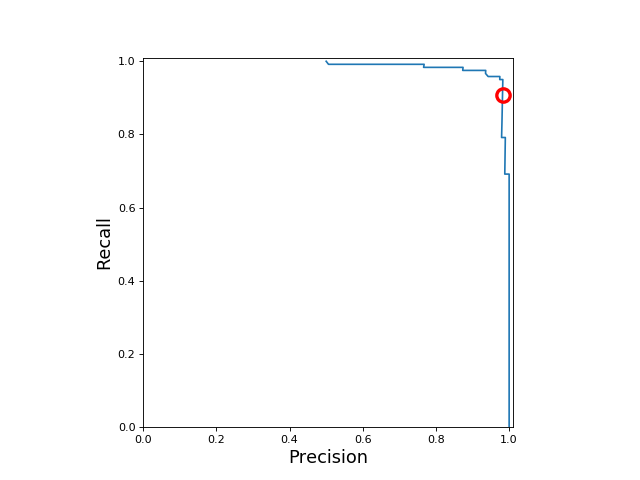

In [32]:
# precision-recall curve
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_scores_lr = lr.decision_function(X_validation_scale)
precision, recall, thresholds = precision_recall_curve(y_validation, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(8, 6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


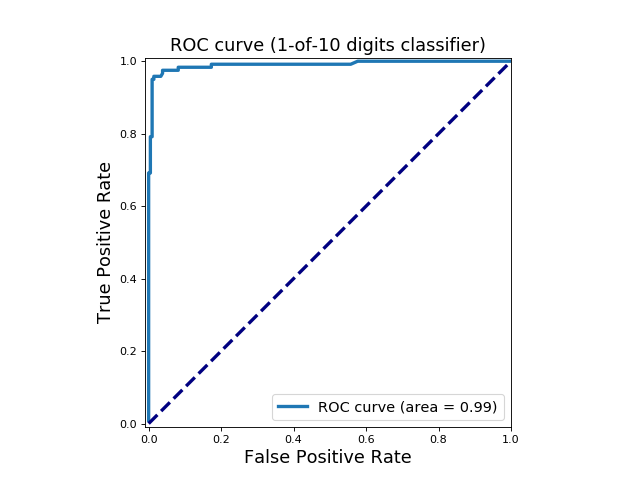

In [33]:
# ROC curve and Area-Under-Curve (AUC)
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_scores_lr = lr.decision_function(X_validation_scale)
fpr_lr, tpr_lr, _ = roc_curve(y_validation, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label="ROC curve (area = {:0.2f})".format(roc_auc_lr))
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC curve (1-of-10 digits classifier)", fontsize=16)
plt.legend(loc="lower right", fontsize=13)
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
plt.axes().set_aspect("equal")
plt.show()

In [34]:
# train with Gradient Boosting algorithm
# compute the accuracy score with different learning rate when training on train and validation sets

learning_rates = [0.1, 0.25, 0.5, 0.75, 1, 5]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(criterion="mse", n_estimators=50, learning_rate = learning_rate, max_features=5, max_depth = 2, random_state = 0)
    gb.fit(X_train_scale, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_scale, y_validation)))
    print()

Learning rate:  0.1
Accuracy score (training): 0.800
Accuracy score (validation): 0.817

Learning rate:  0.25
Accuracy score (training): 0.902
Accuracy score (validation): 0.912

Learning rate:  0.5
Accuracy score (training): 0.937
Accuracy score (validation): 0.924

Learning rate:  0.75
Accuracy score (training): 0.952
Accuracy score (validation): 0.945

Learning rate:  1
Accuracy score (training): 0.949
Accuracy score (validation): 0.939

Learning rate:  5
Accuracy score (training): 0.382
Accuracy score (validation): 0.360



In [35]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(criterion="mse", n_estimators=50, learning_rate = 0.75, max_features=5, max_depth = 2, random_state = 0)
gb.fit(X_train_scale, y_train)
predictions = gb.predict(X_validation_scale)

print("Confusion Matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification Report")
print(classification_report(y_validation, predictions))

Confusion Matrix:
[[205   3]
 [ 15 105]]

Classification Report
             precision    recall  f1-score   support

        0.0       0.93      0.99      0.96       208
        1.0       0.97      0.88      0.92       120

avg / total       0.95      0.95      0.94       328



<IPython.core.display.Javascript object>


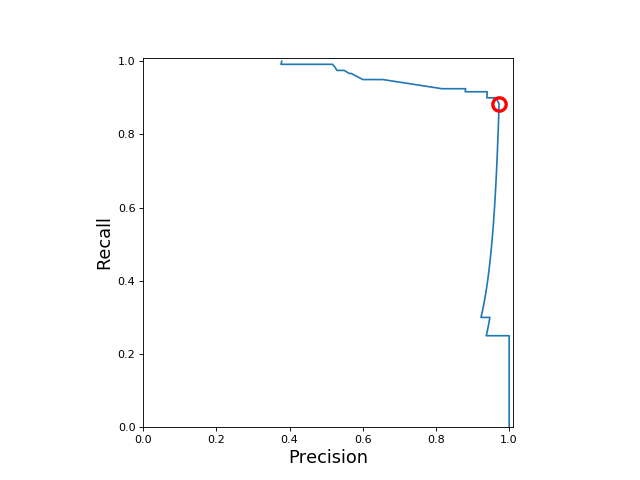

In [36]:
# precision-recall curve
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
y_scores_gb = gb.decision_function(X_validation_scale)
precision, recall, thresholds = precision_recall_curve(y_validation, y_scores_gb)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize=(8, 6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


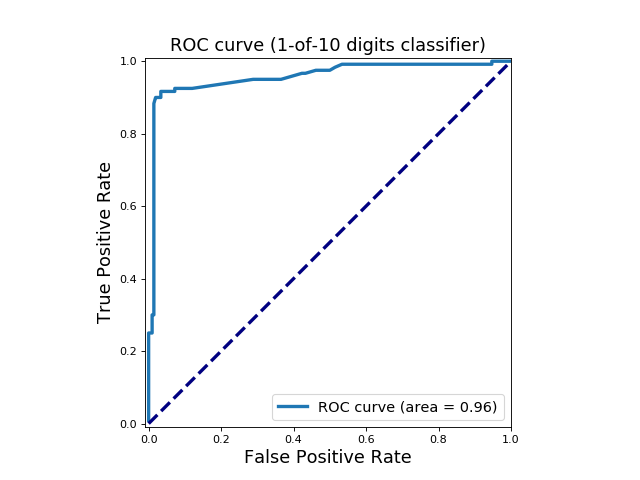

In [37]:
# ROC curve and Area-Under-Curve (AUC)
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_scores_gb = gb.decision_function(X_validation_scale)
fpr_gb, tpr_gb, _ = roc_curve(y_validation, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_gb, tpr_gb, lw=3, label="ROC curve (area = {:0.2f})".format(roc_auc_gb))
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC curve (1-of-10 digits classifier)", fontsize=16)
plt.legend(loc="lower right", fontsize=13)
plt.plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
plt.axes().set_aspect("equal")
plt.show()

In [38]:
# The feature importance measure exposed in Gradient Boosting GradientBoostingClassifier() implementation
features = list(titanic)
feature_importances = gb.feature_importances_
feature_importances = 100.0 * (feature_importances / feature_importances.max())
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), feature_importances), features), reverse=True)[:20])


Features sorted by their score:
[(100.0, 'boat_16'), (94.136499999999998, 'boat_C'), (59.957799999999999, 'fare'), (54.557200000000002, 'boat_5'), (52.4968, 'boat_6'), (50.139400000000002, 'boat_15'), (49.865600000000001, 'boat_2'), (49.257599999999996, 'boat_14'), (44.948, 'boat_10'), (42.441299999999998, 'boat_7'), (40.021599999999999, 'boat_4'), (37.309699999999999, 'cabin_C52'), (35.590499999999999, 'boat_13'), (32.836199999999998, 'age'), (32.554299999999998, 'boat_11'), (32.531100000000002, 'parch'), (31.970800000000001, 'sibsp'), (31.939399999999999, 'boat_12'), (30.8325, 'cabin_F33'), (28.6417, 'boat_13 15')]
